## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.181993  0.067816  1.618054 -0.474050 -1.446193  0.666924
1  1.898950 -0.094241 -0.743678  1.207725  0.658390  1.631250
2 -1.515737  0.614044 -0.677333 -0.467810  0.310542 -1.092058
3  0.714759 -1.102471  0.268572  1.340245  0.848718  0.425493
4 -0.377361 -1.735750  0.923678 -0.291582 -0.387625 -1.388486


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9885725	total: 55.8ms	remaining: 55.7s
1:	learn: 0.9791886	total: 56.3ms	remaining: 28.1s
2:	learn: 0.9675722	total: 56.9ms	remaining: 18.9s
3:	learn: 0.9574282	total: 57.5ms	remaining: 14.3s
4:	learn: 0.9467503	total: 58ms	remaining: 11.5s
5:	learn: 0.9373775	total: 58.6ms	remaining: 9.71s
6:	learn: 0.9244996	total: 59.1ms	remaining: 8.39s
7:	learn: 0.9142117	total: 59.7ms	remaining: 7.4s
8:	learn: 0.9046219	total: 60.2ms	remaining: 6.63s
9:	learn: 0.8934408	total: 60.8ms	remaining: 6.02s
10:	learn: 0.8834490	total: 61.3ms	remaining: 5.51s
11:	learn: 0.8721873	total: 61.8ms	remaining: 5.09s
12:	learn: 0.8618331	total: 62.5ms	remaining: 4.75s
13:	learn: 0.8520258	total: 63.1ms	remaining: 4.44s
14:	learn: 0.8453242	total: 63.5ms	remaining: 4.17s
15:	learn: 0.8357729	total: 64.1ms	remaining: 3.94s
16:	learn: 0.8267629	total: 64.6ms	remaining: 3.73s
17:	learn: 0.8184253	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8092460	total: 65.6ms	remaining: 3

79:	learn: 0.4331892	total: 96.3ms	remaining: 1.11s
80:	learn: 0.4286667	total: 96.9ms	remaining: 1.1s
81:	learn: 0.4242053	total: 97.4ms	remaining: 1.09s
82:	learn: 0.4202215	total: 97.8ms	remaining: 1.08s
83:	learn: 0.4162327	total: 98.3ms	remaining: 1.07s
84:	learn: 0.4117739	total: 98.8ms	remaining: 1.06s
85:	learn: 0.4081074	total: 99.4ms	remaining: 1.06s
86:	learn: 0.4035522	total: 99.9ms	remaining: 1.05s
87:	learn: 0.3995712	total: 100ms	remaining: 1.04s
88:	learn: 0.3960984	total: 101ms	remaining: 1.03s
89:	learn: 0.3928027	total: 102ms	remaining: 1.03s
90:	learn: 0.3890918	total: 102ms	remaining: 1.02s
91:	learn: 0.3853745	total: 103ms	remaining: 1.01s
92:	learn: 0.3818733	total: 103ms	remaining: 1s
93:	learn: 0.3780643	total: 104ms	remaining: 999ms
94:	learn: 0.3750237	total: 104ms	remaining: 992ms
95:	learn: 0.3716250	total: 105ms	remaining: 985ms
96:	learn: 0.3684075	total: 105ms	remaining: 979ms
97:	learn: 0.3649175	total: 106ms	remaining: 972ms
98:	learn: 0.3615849	total:

242:	learn: 0.1159651	total: 187ms	remaining: 582ms
243:	learn: 0.1150742	total: 187ms	remaining: 580ms
244:	learn: 0.1142731	total: 188ms	remaining: 579ms
245:	learn: 0.1134563	total: 188ms	remaining: 577ms
246:	learn: 0.1126048	total: 189ms	remaining: 575ms
247:	learn: 0.1118209	total: 189ms	remaining: 574ms
248:	learn: 0.1110752	total: 190ms	remaining: 572ms
249:	learn: 0.1103168	total: 190ms	remaining: 570ms
250:	learn: 0.1095038	total: 191ms	remaining: 569ms
251:	learn: 0.1088098	total: 191ms	remaining: 567ms
252:	learn: 0.1080415	total: 192ms	remaining: 566ms
253:	learn: 0.1073230	total: 192ms	remaining: 564ms
254:	learn: 0.1065232	total: 193ms	remaining: 563ms
255:	learn: 0.1057138	total: 193ms	remaining: 561ms
256:	learn: 0.1048899	total: 194ms	remaining: 560ms
257:	learn: 0.1041485	total: 194ms	remaining: 559ms
258:	learn: 0.1034378	total: 195ms	remaining: 557ms
259:	learn: 0.1027235	total: 195ms	remaining: 555ms
260:	learn: 0.1020061	total: 196ms	remaining: 554ms
261:	learn: 

421:	learn: 0.0433475	total: 280ms	remaining: 384ms
422:	learn: 0.0431454	total: 281ms	remaining: 383ms
423:	learn: 0.0430335	total: 281ms	remaining: 382ms
424:	learn: 0.0427933	total: 282ms	remaining: 381ms
425:	learn: 0.0426484	total: 282ms	remaining: 380ms
426:	learn: 0.0424115	total: 283ms	remaining: 379ms
427:	learn: 0.0423049	total: 283ms	remaining: 379ms
428:	learn: 0.0421753	total: 284ms	remaining: 378ms
429:	learn: 0.0419457	total: 284ms	remaining: 377ms
430:	learn: 0.0417975	total: 285ms	remaining: 376ms
431:	learn: 0.0416104	total: 285ms	remaining: 375ms
432:	learn: 0.0415077	total: 286ms	remaining: 374ms
433:	learn: 0.0412827	total: 286ms	remaining: 373ms
434:	learn: 0.0411559	total: 287ms	remaining: 372ms
435:	learn: 0.0409582	total: 287ms	remaining: 371ms
436:	learn: 0.0407798	total: 288ms	remaining: 371ms
437:	learn: 0.0406065	total: 289ms	remaining: 371ms
438:	learn: 0.0404419	total: 289ms	remaining: 370ms
439:	learn: 0.0402813	total: 290ms	remaining: 369ms
440:	learn: 

597:	learn: 0.0242298	total: 371ms	remaining: 249ms
598:	learn: 0.0241254	total: 371ms	remaining: 249ms
599:	learn: 0.0239626	total: 372ms	remaining: 248ms
600:	learn: 0.0238837	total: 372ms	remaining: 247ms
601:	learn: 0.0237962	total: 373ms	remaining: 247ms
602:	learn: 0.0237076	total: 373ms	remaining: 246ms
603:	learn: 0.0236228	total: 374ms	remaining: 245ms
604:	learn: 0.0234657	total: 374ms	remaining: 244ms
605:	learn: 0.0233763	total: 374ms	remaining: 243ms
606:	learn: 0.0233005	total: 375ms	remaining: 243ms
607:	learn: 0.0232183	total: 375ms	remaining: 242ms
608:	learn: 0.0231443	total: 376ms	remaining: 241ms
609:	learn: 0.0229922	total: 376ms	remaining: 241ms
610:	learn: 0.0229268	total: 377ms	remaining: 240ms
611:	learn: 0.0228471	total: 377ms	remaining: 239ms
612:	learn: 0.0226991	total: 378ms	remaining: 238ms
613:	learn: 0.0226303	total: 378ms	remaining: 238ms
614:	learn: 0.0225597	total: 379ms	remaining: 237ms
615:	learn: 0.0224372	total: 379ms	remaining: 236ms
616:	learn: 

787:	learn: 0.0106410	total: 464ms	remaining: 125ms
788:	learn: 0.0106080	total: 464ms	remaining: 124ms
789:	learn: 0.0105636	total: 465ms	remaining: 124ms
790:	learn: 0.0105284	total: 465ms	remaining: 123ms
791:	learn: 0.0104961	total: 466ms	remaining: 122ms
792:	learn: 0.0104588	total: 467ms	remaining: 122ms
793:	learn: 0.0104272	total: 467ms	remaining: 121ms
794:	learn: 0.0103844	total: 468ms	remaining: 121ms
795:	learn: 0.0103532	total: 468ms	remaining: 120ms
796:	learn: 0.0103112	total: 469ms	remaining: 119ms
797:	learn: 0.0102750	total: 469ms	remaining: 119ms
798:	learn: 0.0102448	total: 470ms	remaining: 118ms
799:	learn: 0.0101871	total: 470ms	remaining: 117ms
800:	learn: 0.0101459	total: 470ms	remaining: 117ms
801:	learn: 0.0101163	total: 471ms	remaining: 116ms
802:	learn: 0.0100600	total: 472ms	remaining: 116ms
803:	learn: 0.0100545	total: 472ms	remaining: 115ms
804:	learn: 0.0100257	total: 473ms	remaining: 115ms
805:	learn: 0.0099707	total: 474ms	remaining: 114ms
806:	learn: 

962:	learn: 0.0053894	total: 554ms	remaining: 21.3ms
963:	learn: 0.0053672	total: 555ms	remaining: 20.7ms
964:	learn: 0.0053527	total: 555ms	remaining: 20.1ms
965:	learn: 0.0053400	total: 556ms	remaining: 19.6ms
966:	learn: 0.0053160	total: 556ms	remaining: 19ms
967:	learn: 0.0052908	total: 557ms	remaining: 18.4ms
968:	learn: 0.0052545	total: 557ms	remaining: 17.8ms
969:	learn: 0.0052334	total: 558ms	remaining: 17.2ms
970:	learn: 0.0052210	total: 558ms	remaining: 16.7ms
971:	learn: 0.0051982	total: 559ms	remaining: 16.1ms
972:	learn: 0.0051739	total: 559ms	remaining: 15.5ms
973:	learn: 0.0051553	total: 560ms	remaining: 14.9ms
974:	learn: 0.0051315	total: 560ms	remaining: 14.4ms
975:	learn: 0.0050968	total: 561ms	remaining: 13.8ms
976:	learn: 0.0050721	total: 561ms	remaining: 13.2ms
977:	learn: 0.0050480	total: 562ms	remaining: 12.6ms
978:	learn: 0.0050381	total: 563ms	remaining: 12.1ms
979:	learn: 0.0050282	total: 563ms	remaining: 11.5ms
980:	learn: 0.0050186	total: 564ms	remaining: 10

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

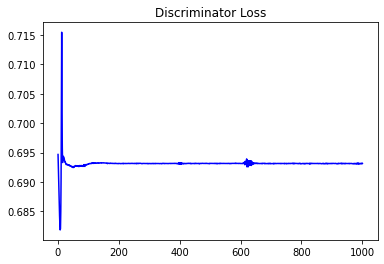

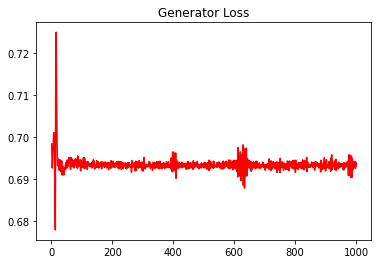

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1798791167688243


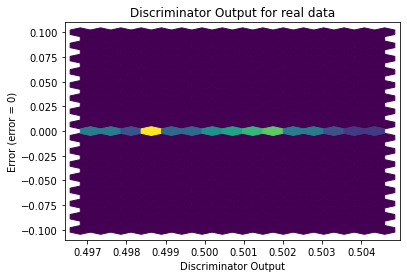

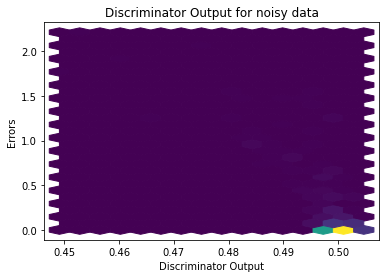

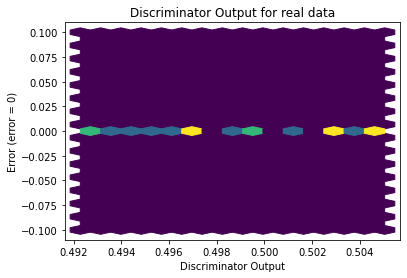

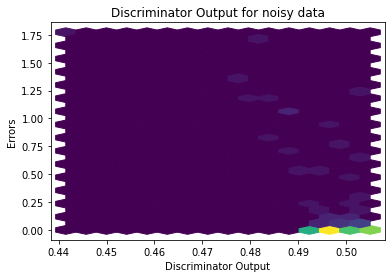

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


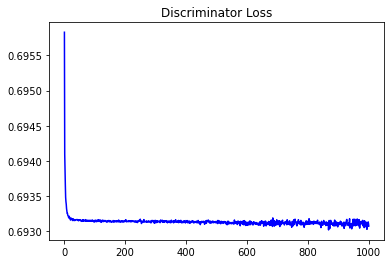

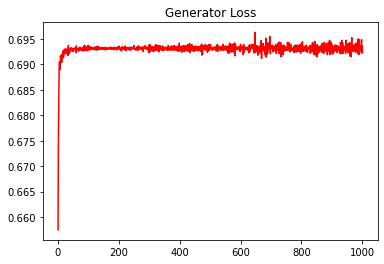

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2536828907665432


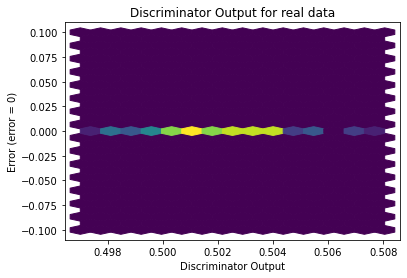

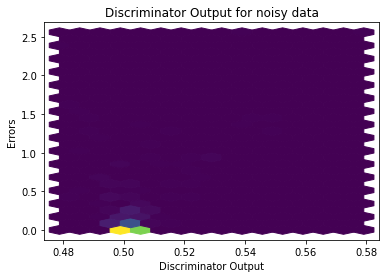

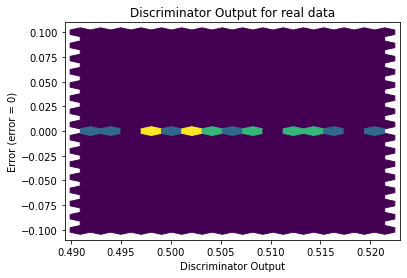

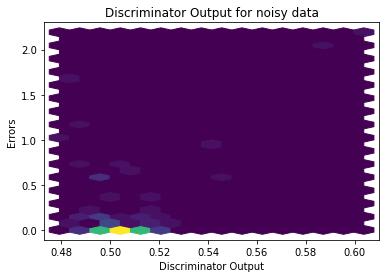

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
